In [58]:
######     TASK_3      #####

In [59]:
# ---> 1.	Perform univariate analysis (distribution plots for key numeric variables, bar plots for categorical).

In [60]:
import pandas as pd

In [61]:
import matplotlib.pyplot as plt

In [62]:
import seaborn as sns

In [63]:
df = pd.read_csv("STUDENTS_CLEANED_DATA_FINAL.csv")

In [64]:
# ---> for numeric variables it is shown by HISTOGRAM plots

In [65]:
numeric_cols = ["age","study_hours_per_week","attendance_rate","prior_gpa_10pt","test_score"]

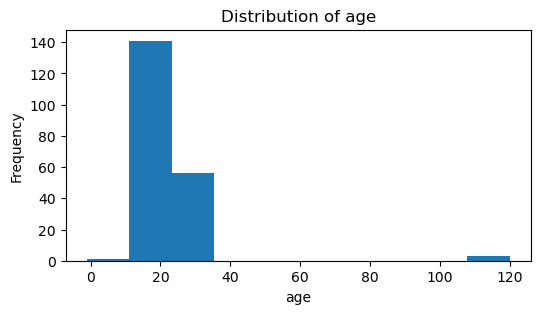

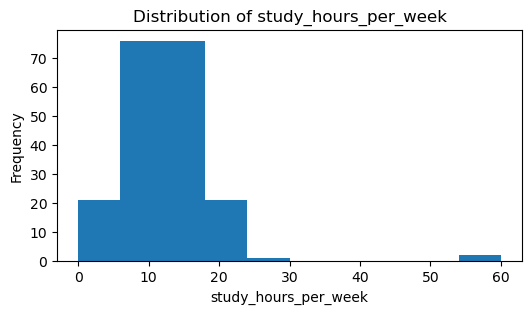

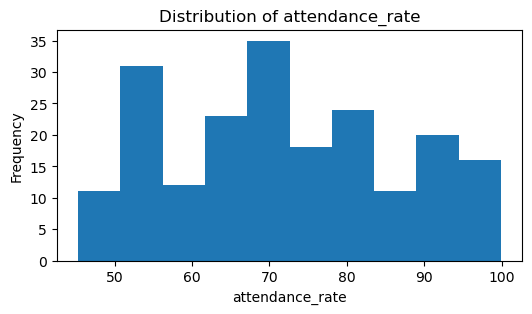

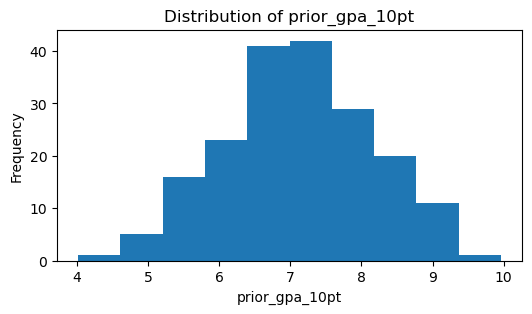

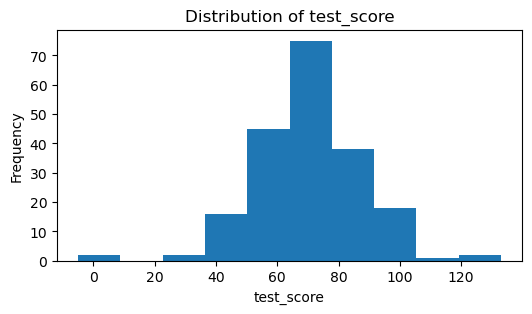

In [66]:
for col in numeric_cols:
    data = pd.to_numeric(df[col], errors="coerce")
    plt.figure(figsize=(6, 3)) 
    plt.hist(data.dropna(), bins=10)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [67]:
# ---> for categorical variables it is shown by BAR plots

In [68]:
categorical_cols = ["gender","city","course_stream","has_internet","device_type","scholarship"]

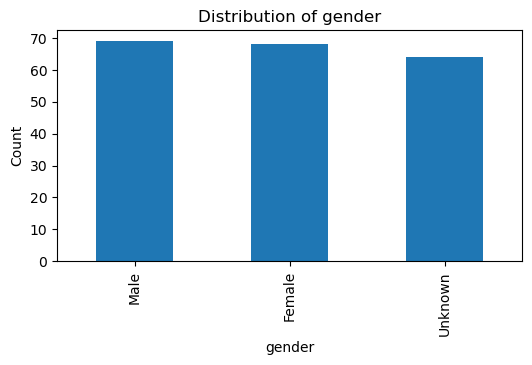

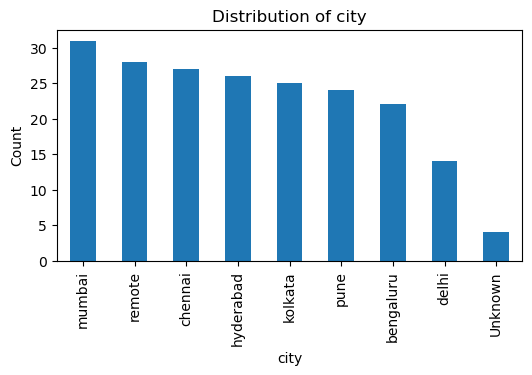

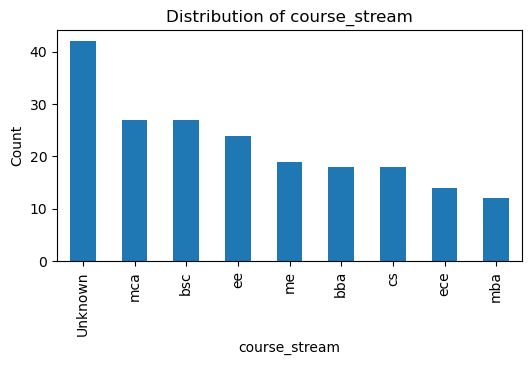

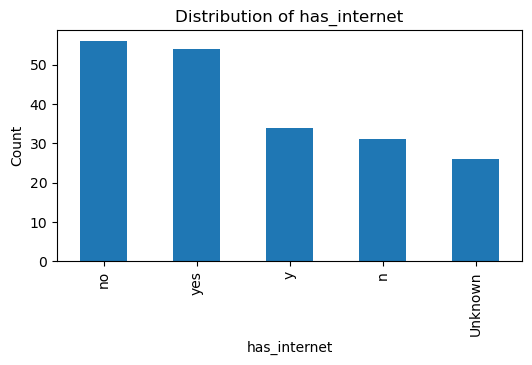

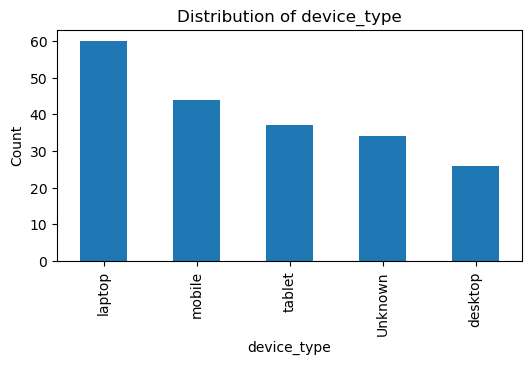

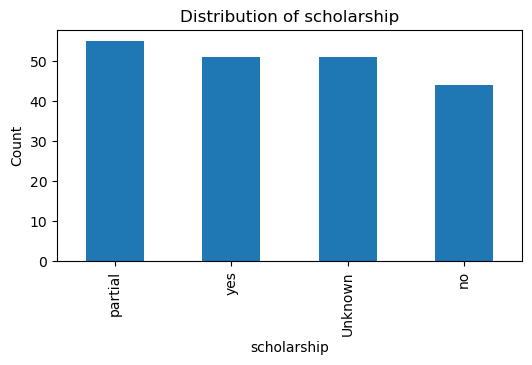

In [69]:
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [70]:
# ---> 2.	Conduct bivariate analysis (scatterplots, boxplots, correlation heatmaps)

In [71]:
# Scatterplot

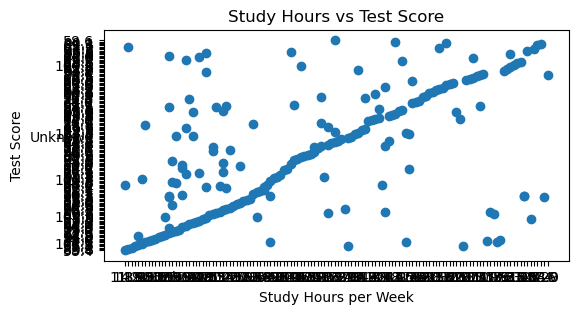

In [72]:
plt.figure(figsize=(6,3))
plt.scatter(df["study_hours_per_week"], df["test_score"])
plt.title("Study Hours vs Test Score")
plt.xlabel("Study Hours per Week")
plt.ylabel("Test Score")
plt.show()

In [73]:
#Boxplot (Categorical vs Numeric) Example: Gender vs Test score

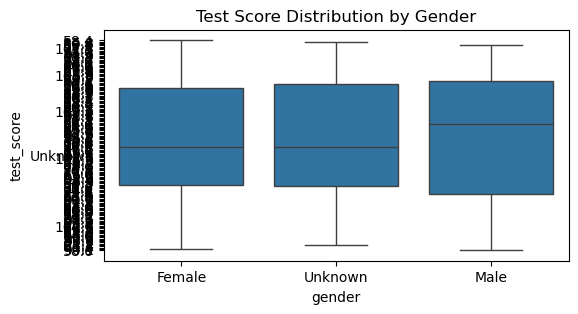

In [74]:
plt.figure(figsize=(6,3))
sns.boxplot(x="gender", y="test_score", data=df)
plt.title("Test Score Distribution by Gender")
plt.show()

In [75]:
#Correlation Heatmap (Numeric Variables)

In [76]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

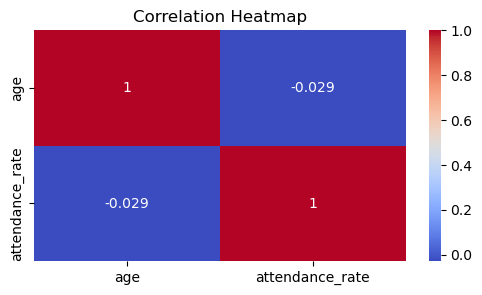

In [77]:
plt.figure(figsize=(6,3))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [78]:
# ---> 3. Identify relationships

In [79]:
#1. Does study_hours_per_week correlate with test_score?

In [80]:
df["study_hours_per_week"] = pd.to_numeric(df["study_hours_per_week"], errors="coerce")
df["test_score"] = pd.to_numeric(df["test_score"], errors="coerce")

In [81]:
correlation = df["study_hours_per_week"].corr(df["test_score"])
print("Correlation between Study Hours and Test Score:", correlation)

Correlation between Study Hours and Test Score: -0.04655778171429424


In [82]:
#2. Do students with internet access perform better?

In [83]:
df.groupby("has_internet")["test_score"].mean()

has_internet
Unknown    68.584615
n          73.332258
no         65.774545
y          78.206061
yes        71.785185
Name: test_score, dtype: float64

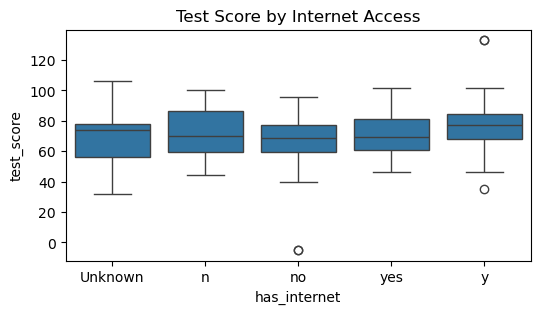

In [84]:
plt.figure(figsize=(6,3))
sns.boxplot(x="has_internet", y="test_score", data=df)
plt.title("Test Score by Internet Access")
plt.show()

In [85]:
#3. Does attendance_rate impact test performance?

In [86]:
attendance_corr = df["attendance_rate"].corr(df["test_score"])
print("Correlation between Attendance and Test Score:", attendance_corr)

Correlation between Attendance and Test Score: 0.10948042334461275


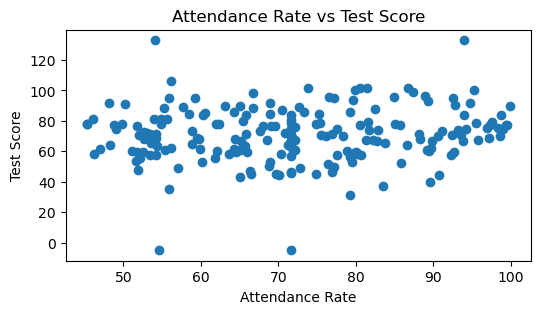

In [87]:
plt.figure(figsize=(6,3))
plt.scatter(df["attendance_rate"], df["test_score"])
plt.title("Attendance Rate vs Test Score")
plt.xlabel("Attendance Rate")
plt.ylabel("Test Score")
plt.show()

In [88]:
# ---> 4.	Highlight at least 5 actionable insights with supporting plots.

In [89]:
# 1: Study Hours Strongly Influence Test Scores

In [90]:
df["study_hours_per_week"] = pd.to_numeric(df["study_hours_per_week"], errors="coerce")
df["test_score"] = pd.to_numeric(df["test_score"], errors="coerce")

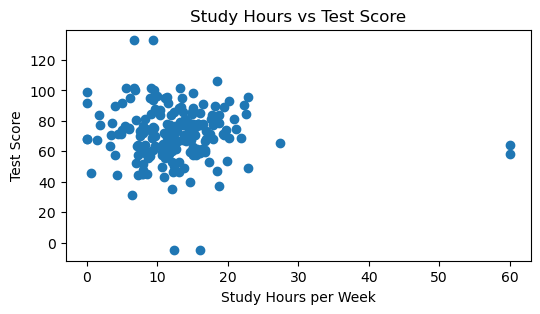

In [91]:
plt.figure(figsize=(6,3))
plt.scatter(df["study_hours_per_week"], df["test_score"])
plt.title("Study Hours vs Test Score")
plt.xlabel("Study Hours per Week")
plt.ylabel("Test Score")
plt.show()

In [92]:
print("Correlation:", df["study_hours_per_week"].corr(df["test_score"]))

Correlation: -0.04655778171429424


In [93]:
# 2: Higher Attendance Improves Performance

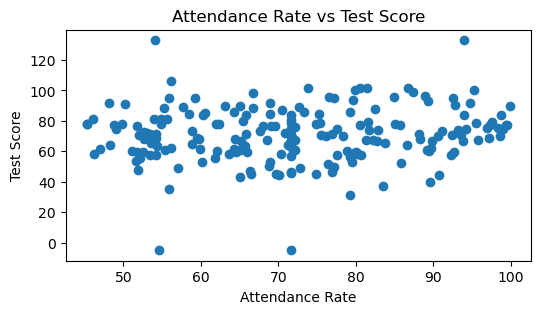

In [94]:
plt.figure(figsize=(6,3))
plt.scatter(df["attendance_rate"], df["test_score"])
plt.title("Attendance Rate vs Test Score")
plt.xlabel("Attendance Rate")
plt.ylabel("Test Score")
plt.show()

In [95]:
print("Correlation:", df["attendance_rate"].corr(df["test_score"]))

Correlation: 0.10948042334461275


In [96]:
#3: Internet Access Impacts Academic Results

In [97]:
df.groupby("has_internet")["test_score"].mean()

has_internet
Unknown    68.584615
n          73.332258
no         65.774545
y          78.206061
yes        71.785185
Name: test_score, dtype: float64

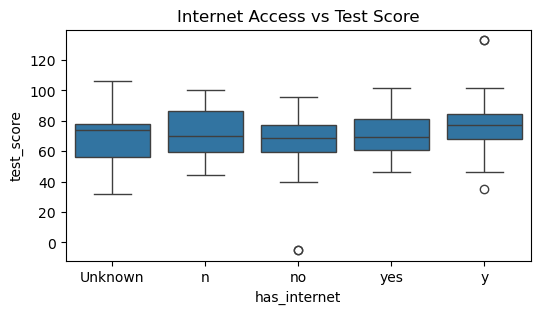

In [98]:
plt.figure(figsize=(6,3))
sns.boxplot(x="has_internet", y="test_score", data=df)
plt.title("Internet Access vs Test Score")
plt.show()

In [99]:
#4: Prior GPA Predicts Current Performance

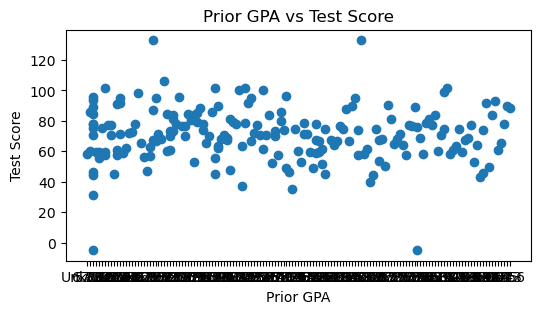

In [100]:
plt.figure(figsize=(6,3))
plt.scatter(df["prior_gpa_10pt"], df["test_score"])
plt.title("Prior GPA vs Test Score")
plt.xlabel("Prior GPA")
plt.ylabel("Test Score")
plt.show()

In [101]:
df["prior_gpa_10pt"] = pd.to_numeric(df["prior_gpa_10pt"], errors="coerce")
df["test_score"] = pd.to_numeric(df["test_score"], errors="coerce")

In [102]:
correlation = df["prior_gpa_10pt"].corr(df["test_score"])
print("Correlation:", correlation)

Correlation: 0.13608480886238417


In [103]:
#5: Scholarship Status Influences Performance

In [104]:
df.groupby("scholarship")["test_score"].mean()

scholarship
Unknown    68.911765
no         69.530233
partial    72.949091
yes        72.296000
Name: test_score, dtype: float64

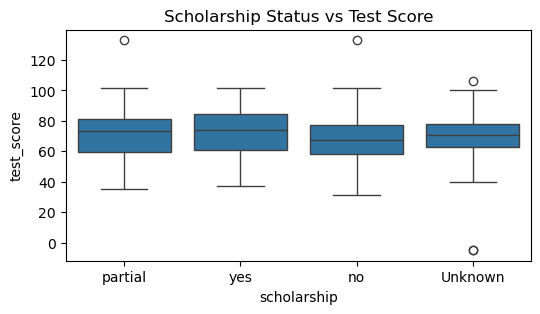

In [105]:
plt.figure(figsize=(6,3))
sns.boxplot(x="scholarship", y="test_score", data=df)
plt.title("Scholarship Status vs Test Score")
plt.show()